# TensorFlow

## Importowanie bibliotek

In [6]:
import sys
sys.path.insert(1, "/mnt/c/Users/PC/Desktop/wikolego-repository/ai-path/ml-next-step/src")

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Inicjalizacja konfiguracji

In [7]:
class config:
    
    # Ścieżki do plików
    NEW_DATA_PATH = "data/train_new.csv"

    # Ogólne ustawienia projektu
    FOLDS_CNT = 5
    EPOCHS_CNT = 10

## Wczytanie danych

In [8]:
# Załadowanie danych MNIST
df = pd.read_csv(config.NEW_DATA_PATH)

df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,kfold
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2


## Sieć neuronowa

In [9]:
def use_model(df_train, df_test, model):

    # Podział danych na odpowiednie zmienne
    x_train = df_train.loc[:, df_train.columns != "label"].values
    y_train = df_train.loc[:, "label"].values

    x_test = df_test.loc[:, df_test.columns != "label"].values
    y_test = df_test.loc[:, "label"].values
    
    # Trenowanie modelu oraz zwrócenie wyników
    result = model.fit(
        x_train,
        y_train,
        batch_size=64,
        epochs=config.EPOCHS_CNT,
        validation_data=(x_test, y_test),
        
    )
    return result

In [10]:
# Inicjalizacja tablicy z rezultatami modeli
results_arr = []

# Testowanie sieci neuronowej na różnych foldach
for fold in range(config.FOLDS_CNT):
    
    # Inicjalizacja train oraz test dataframe
    df_train = df.loc[df["kfold"] != fold, df.columns != "kfold"]
    df_test = df.loc[df["kfold"] == fold, df.columns != "kfold"]

    # Stworzenie modelu
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(shape=(28*28, )), # Warstwa wejściowa
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax") # Warstwa wyjściowa
    ])
    
    # Kompilacja modelu
    model.compile(
        optimizer="Adam",
        loss="SparseCategoricalCrossentropy",
        metrics=["SparseCategoricalAccuracy"]
    )

    # Wygenerowanie wyników
    result = use_model(df_train, df_test, model)

    # Dodanie wyników do tablicy rezultatów
    results_arr.append(result)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - SparseCategoricalAccuracy: 0.6728 - loss: 19.2605 - val_SparseCategoricalAccuracy: 0.8705 - val_loss: 2.3211
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - SparseCategoricalAccuracy: 0.9259 - loss: 1.0043 - val_SparseCategoricalAccuracy: 0.8950 - val_loss: 1.5423
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - SparseCategoricalAccuracy: 0.9510 - loss: 0.5188 - val_SparseCategoricalAccuracy: 0.9215 - val_loss: 1.3104
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - SparseCategoricalAccuracy: 0.9701 - loss: 0.2965 - val_SparseCategoricalAccuracy: 0.9165 - val_loss: 1.2558
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - SparseCategoricalAccuracy: 0.9706 - loss: 0.2448 - val_SparseCategoricalAccuracy: 0.9305 - val_loss: 1.1844
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - SparseCategoricalAccuracy: 0.9798 - loss: 0.1725 - val_SparseCategoricalAccuracy: 0.9340 - val_loss: 1.1505
Epoch 7/10
125/125 ━━━━━━━

## Wyświetlenie wyników

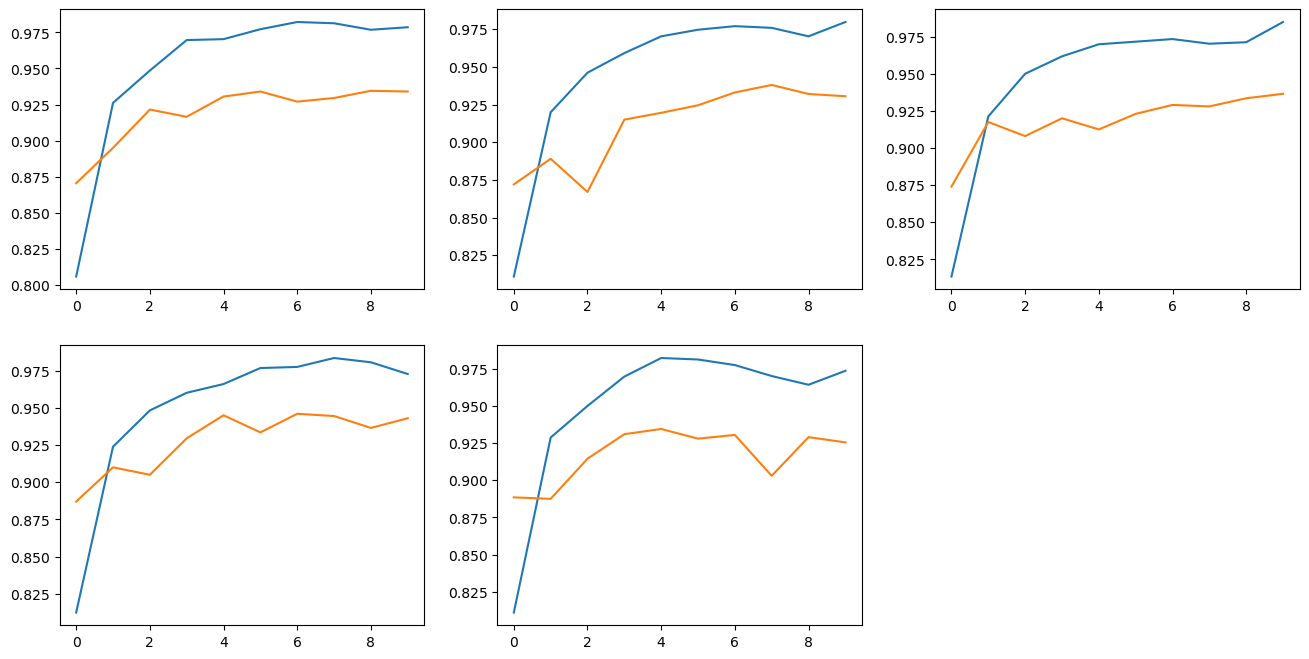

In [20]:
# Ustawienie rozmiaru ekranu, na którym wyświetlą się wykresy
fig = plt.figure(figsize=(16, 8))

# Przejście po tablicy rezultatów
for index, result in enumerate(results_arr):
    
    # Wygenerowanie wykresu dla wyników accuracy
    fig.add_subplot((config.FOLDS_CNT - 1) // 3 + 1, 3, index + 1)

    # plt.xlim(0, 20)
    # plt.ylim(0, 1)
    
    plt.plot(result.history["SparseCategoricalAccuracy"])
    plt.plot(result.history["val_SparseCategoricalAccuracy"])

# Wyświetlenie wykresów
plt.show()

In [15]:
# Średnia wartość accuracy
acc_sum = 0
val_acc_sum = 0

for result in results_arr:
    acc_sum = acc_sum + np.mean(result.history["SparseCategoricalAccuracy"][config.EPOCHS_CNT - 1])
    val_acc_sum = val_acc_sum + np.mean(result.history["val_SparseCategoricalAccuracy"][config.EPOCHS_CNT - 1])

print(f"avg accuracy: {acc_sum / len(results_arr)}")
print(f"avg val_accuracy: {val_acc_sum / len(results_arr)}")

avg accuracy: 0.9779000043869018
avg val_accuracy: 0.933899998664856


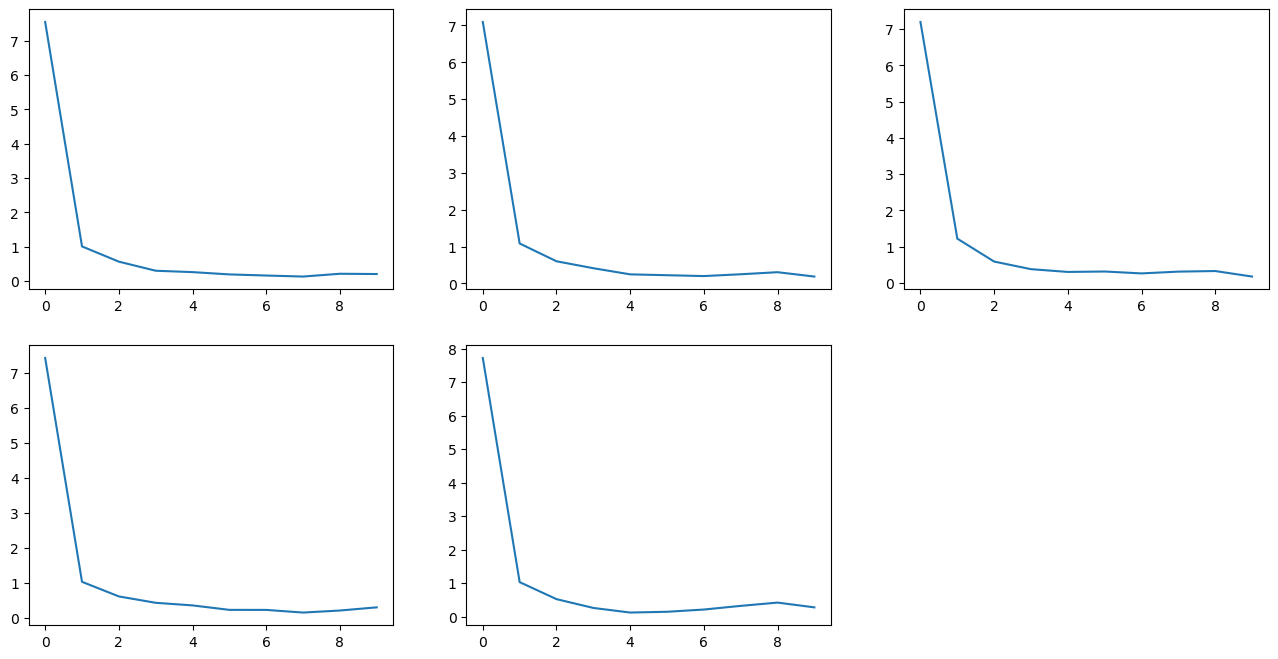

In [16]:
# Ustawienie rozmiaru ekranu, na którym wyświetlą się wykresy
fig = plt.figure(figsize=(16, 8))

# Przejście po tablicy rezultatów
for index, result in enumerate(results_arr):
    
    # Wygenerowanie wykresu dla strat
    fig.add_subplot((config.FOLDS_CNT - 1) // 3 + 1, 3, index + 1)
    plt.plot(result.history["loss"])

# Wyświetlenie wykresów
plt.show()